# Credit Default Project

In [117]:
import pandas as pd
import numpy as np
from pandas_profiling import ProfileReport
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt

In [118]:
df = pd.read_excel(r"default_of_credit_card_clients.xls", header=1)

In [119]:
df.head(10)

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
0,1,20000,2,2,1,24,2,2,-1,-1,...,0,0,0,0,689,0,0,0,0,1
1,2,120000,2,2,2,26,-1,2,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,3,90000,2,2,2,34,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,4,50000,2,2,1,37,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,5,50000,1,2,1,57,-1,0,-1,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0
5,6,50000,1,1,2,37,0,0,0,0,...,19394,19619,20024,2500,1815,657,1000,1000,800,0
6,7,500000,1,1,2,29,0,0,0,0,...,542653,483003,473944,55000,40000,38000,20239,13750,13770,0
7,8,100000,2,2,2,23,0,-1,-1,0,...,221,-159,567,380,601,0,581,1687,1542,0
8,9,140000,2,3,1,28,0,0,2,0,...,12211,11793,3719,3329,0,432,1000,1000,1000,0
9,10,20000,1,3,2,35,-2,-2,-2,-2,...,0,13007,13912,0,0,0,13007,1122,0,0


In [120]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 25 columns):
 #   Column                      Non-Null Count  Dtype
---  ------                      --------------  -----
 0   ID                          30000 non-null  int64
 1   LIMIT_BAL                   30000 non-null  int64
 2   SEX                         30000 non-null  int64
 3   EDUCATION                   30000 non-null  int64
 4   MARRIAGE                    30000 non-null  int64
 5   AGE                         30000 non-null  int64
 6   PAY_0                       30000 non-null  int64
 7   PAY_2                       30000 non-null  int64
 8   PAY_3                       30000 non-null  int64
 9   PAY_4                       30000 non-null  int64
 10  PAY_5                       30000 non-null  int64
 11  PAY_6                       30000 non-null  int64
 12  BILL_AMT1                   30000 non-null  int64
 13  BILL_AMT2                   30000 non-null  int64
 14  BILL_A

In [121]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
ID,30000.0,15000.500000,8660.398374,1.0,7500.75,15000.5,22500.25,30000.0
LIMIT_BAL,30000.0,167484.322667,129747.661567,10000.0,50000.00,140000.0,240000.00,1000000.0
SEX,30000.0,1.603733,0.489129,1.0,1.00,2.0,2.00,2.0
EDUCATION,30000.0,1.853133,0.790349,0.0,1.00,2.0,2.00,6.0
MARRIAGE,30000.0,1.551867,0.521970,0.0,1.00,2.0,2.00,3.0
AGE,30000.0,35.485500,9.217904,21.0,28.00,34.0,41.00,79.0
PAY_0,30000.0,-0.016700,1.123802,-2.0,-1.00,0.0,0.00,8.0
PAY_2,30000.0,-0.133767,1.197186,-2.0,-1.00,0.0,0.00,8.0
PAY_3,30000.0,-0.166200,1.196868,-2.0,-1.00,0.0,0.00,8.0
PAY_4,30000.0,-0.220667,1.169139,-2.0,-1.00,0.0,0.00,8.0


In [122]:
df.rename(columns={'PAY_0': 'PAY_1'}, inplace=True)

## ID

This is effectively an index, and we drop it from the dataframe.

In [123]:
df=df.drop(columns=['ID'])

## Limit Balance

This is the amount of given credit, in Taiwan dollars (NT). 

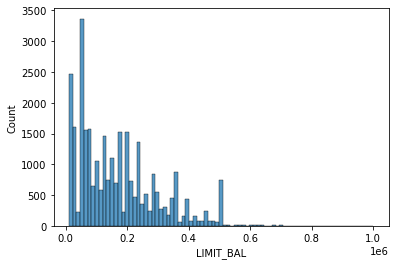

In [124]:
sns.histplot(data=df, x='LIMIT_BAL')
plt.show()

## Sex

This column consists of two categories. There are more samples from category 2.

In [125]:
sorted(df['SEX'].unique())

[1, 2]

In [126]:
df=df.astype({'SEX': 'category'})

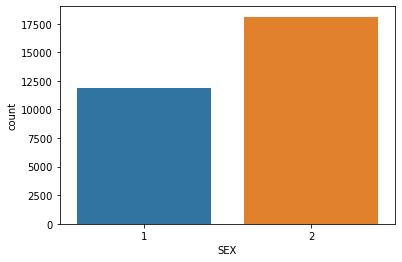

In [127]:
sns.countplot(data=df, x='SEX')
plt.show()

## Education

This is a categorical variable. 1=graduate school, 2=university, 3=high school, 4=others.

In [128]:
sorted(df['EDUCATION'].unique())

[0, 1, 2, 3, 4, 5, 6]

In [129]:
df = df[df.EDUCATION<=4]

In [130]:
df

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_1,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
0,20000,2,2,1,24,2,2,-1,-1,-2,...,0,0,0,0,689,0,0,0,0,1
1,120000,2,2,2,26,-1,2,0,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,90000,2,2,2,34,0,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,50000,2,2,1,37,0,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,50000,1,2,1,57,-1,0,-1,0,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29995,220000,1,3,1,39,0,0,0,0,0,...,88004,31237,15980,8500,20000,5003,3047,5000,1000,0
29996,150000,1,3,2,43,-1,-1,-1,-1,0,...,8979,5190,0,1837,3526,8998,129,0,0,0
29997,30000,1,2,2,37,4,3,2,-1,0,...,20878,20582,19357,0,0,22000,4200,2000,3100,1
29998,80000,1,3,1,41,1,-1,0,0,0,...,52774,11855,48944,85900,3409,1178,1926,52964,1804,1


In [141]:
df=df.astype({'EDUCATION': 'category'})

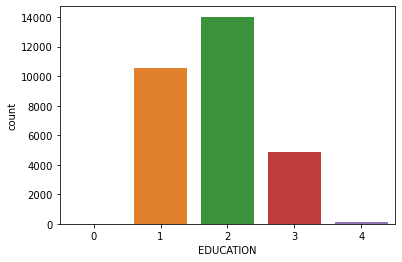

In [142]:
sns.countplot(data=df, x='EDUCATION')
plt.show()

## Marital Status

Marital status is a categorical variable.
    1 = married
    2 = single
    3 = others
However, there are 54 records with invalid entries.

In [133]:
sorted(df['MARRIAGE'].unique())

[0, 1, 2, 3]

In [134]:
len(df.loc[df['MARRIAGE']==0])

54

In [135]:
df = df[df.MARRIAGE!=0]

In [136]:
df = df.reset_index(drop=True)

In [137]:
df=df.astype({'MARRIAGE': 'category'})

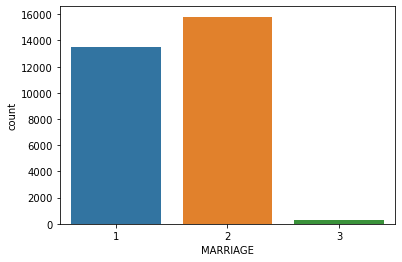

In [138]:
sns.countplot(data=df, x='MARRIAGE')
plt.show()

## Age

The data consists of individuals ages 21-79, average of 35.

In [155]:
df.AGE.describe()

count    29615.000000
mean        35.465676
std          9.212610
min         21.000000
25%         28.000000
50%         34.000000
75%         41.000000
max         79.000000
Name: AGE, dtype: float64

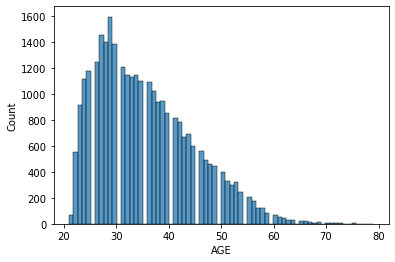

In [156]:
sns.histplot(data=df, x='AGE')
plt.show()

## Payment History

Past monthly payment records from April to September, 2005. 

* PAY_1 = the repayment status in September, 2005
* PAY_2 = the repayment status in August, 2005
* PAY_3 = the repayment status in July, 2005
* PAY_4 = the repayment status in June, 2005
* PAY_5 = the repayment status in May, 2005
* PAY_6 = the repayment status in April, 2005

The measurement scale for the repayment status is: 

* -1 = pay duly
* 1 = payment delay for one month
* 2 = payment delay for two months
* ...
* 8 = payment delay for eight months
* 9 = payment delay for nine months and above

In [186]:
# It appears that the values have been shifted from the key.
for i in range(1,7):
    print(sorted(df['PAY_'+str(i)].unique()))

[-2, -1, 0, 1, 2, 3, 4, 5, 6, 7, 8]
[-2, -1, 0, 1, 2, 3, 4, 5, 6, 7, 8]
[-2, -1, 0, 1, 2, 3, 4, 5, 6, 7, 8]
[-2, -1, 0, 1, 2, 3, 4, 5, 6, 7, 8]
[-2, -1, 0, 2, 3, 4, 5, 6, 7, 8]
[-2, -1, 0, 2, 3, 4, 5, 6, 7, 8]


In [189]:
df=df.astype({'PAY_1': 'category', 
              'PAY_2': 'category',
              'PAY_3': 'category', 
              'PAY_4': 'category',
              'PAY_5': 'category',
              'PAY_6': 'category'})

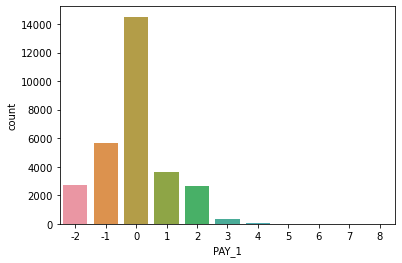

In [190]:
sns.countplot(data=df, x='PAY_1')
plt.show()

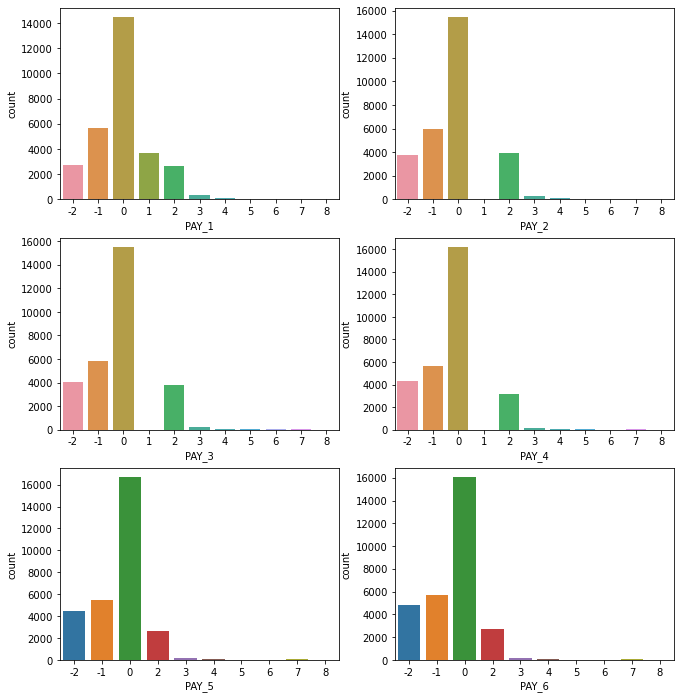

In [199]:
fig, axes = plt.subplots(3, 2, figsize=(11, 12))
sns.countplot(ax=axes[0,0], data=df, x='PAY_1')
sns.countplot(ax=axes[0,1], data=df, x='PAY_2')
sns.countplot(ax=axes[1,0], data=df, x='PAY_3')
sns.countplot(ax=axes[1,1], data=df, x='PAY_4')
sns.countplot(ax=axes[2,0], data=df, x='PAY_5')
sns.countplot(ax=axes[2,1], data=df, x='PAY_6')
plt.show()

## Bill Statement Amount

* BILL_AMT1 = amount of bill statement in September, 2005
* BILL_AMT2 = amount of bill statement in August, 2005
* BILL_AMT3 = amount of bill statement in July, 2005
* BILL_AMT4 = amount of bill statement in June, 2005
* BILL_AMT5 = amount of bill statement in May, 2005
* BILL_AMT6 = amount of bill statement in April, 2005 

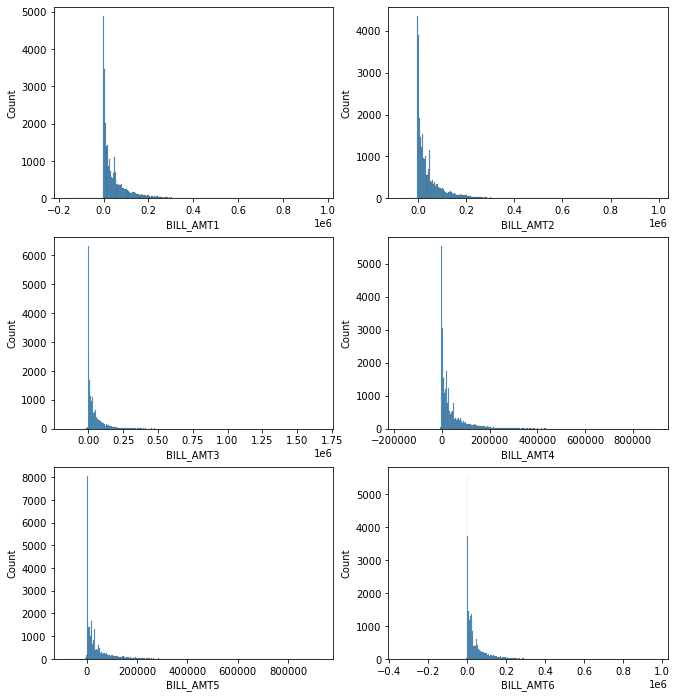

In [229]:
fig, axes = plt.subplots(3, 2, figsize=(11, 12))
sns.histplot(ax=axes[0,0], data=df, x='BILL_AMT1')
sns.histplot(ax=axes[0,1], data=df, x='BILL_AMT2')
sns.histplot(ax=axes[1,0], data=df, x='BILL_AMT3')
sns.histplot(ax=axes[1,1], data=df, x='BILL_AMT4')
sns.histplot(ax=axes[2,0], data=df, x='BILL_AMT5')
sns.histplot(ax=axes[2,1], data=df, x='BILL_AMT6')
plt.show()

## Amount Paid

* PAY_AMT1 = amount of bill statement in September, 2005
* PAY_AMT2 = amount of bill statement in August, 2005
* PAY_AMT3 = amount of bill statement in July, 2005
* PAY_AMT4 = amount of bill statement in June, 2005
* PAY_AMT5 = amount of bill statement in May, 2005
* PAY_AMT6 = amount of bill statement in April, 2005 

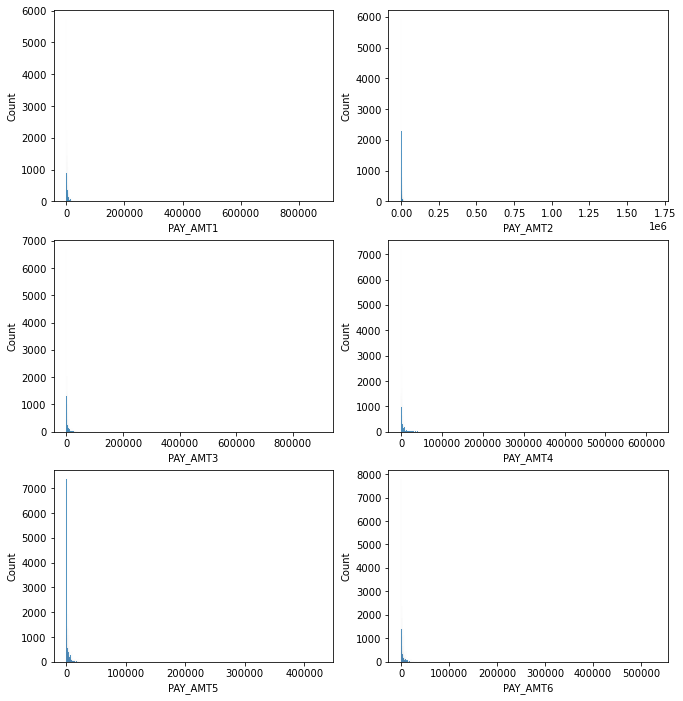

In [204]:
fig, axes = plt.subplots(3, 2, figsize=(11, 12))
sns.histplot(ax=axes[0,0], data=df, x='PAY_AMT1')
sns.histplot(ax=axes[0,1], data=df, x='PAY_AMT2')
sns.histplot(ax=axes[1,0], data=df, x='PAY_AMT3')
sns.histplot(ax=axes[1,1], data=df, x='PAY_AMT4')
sns.histplot(ax=axes[2,0], data=df, x='PAY_AMT5')
sns.histplot(ax=axes[2,1], data=df, x='PAY_AMT6')
plt.show()

## Default Payment

In [206]:
df.rename(columns={'default payment next month': 'DEFAULT'}, inplace=True)

In [207]:
df=df.astype({'DEFAULT': 'category'})

In [208]:
df.dtypes

LIMIT_BAL       int64
SEX          category
EDUCATION    category
MARRIAGE     category
AGE             int64
PAY_1        category
PAY_2        category
PAY_3        category
PAY_4        category
PAY_5        category
PAY_6        category
BILL_AMT1       int64
BILL_AMT2       int64
BILL_AMT3       int64
BILL_AMT4       int64
BILL_AMT5       int64
BILL_AMT6       int64
PAY_AMT1        int64
PAY_AMT2        int64
PAY_AMT3        int64
PAY_AMT4        int64
PAY_AMT5        int64
PAY_AMT6        int64
DEFAULT      category
dtype: object

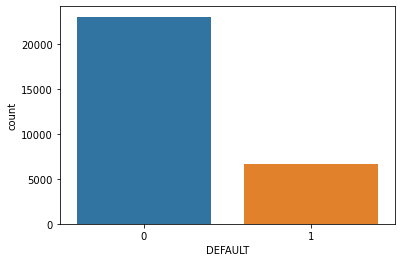

In [209]:
sns.countplot(data=df, x='DEFAULT')
plt.show()

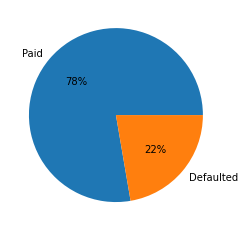

In [224]:
plt.pie(df.DEFAULT.value_counts(normalize=True)*100, 
        labels=['Paid', 'Defaulted'], autopct='%.0f%%')
plt.show()

In [216]:
df['DEFAULT'].describe()

count     29615
unique        2
top           0
freq      23010
Name: DEFAULT, dtype: int64

In [213]:
#A nice profile report of the data is generated by the command below, 
#but the output is a bulky html file.
#profile = ProfileReport(df)
#profile

In [214]:
df

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_1,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,DEFAULT
0,20000,2,2,1,24,2,2,-1,-1,-2,...,0,0,0,0,689,0,0,0,0,1
1,120000,2,2,2,26,-1,2,0,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,90000,2,2,2,34,0,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,50000,2,2,1,37,0,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,50000,1,2,1,57,-1,0,-1,0,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29610,220000,1,3,1,39,0,0,0,0,0,...,88004,31237,15980,8500,20000,5003,3047,5000,1000,0
29611,150000,1,3,2,43,-1,-1,-1,-1,0,...,8979,5190,0,1837,3526,8998,129,0,0,0
29612,30000,1,2,2,37,4,3,2,-1,0,...,20878,20582,19357,0,0,22000,4200,2000,3100,1
29613,80000,1,3,1,41,1,-1,0,0,0,...,52774,11855,48944,85900,3409,1178,1926,52964,1804,1


In [21]:
from sklearn.model_selection import train_test_split

df_train, df_test = train_test_split(df.copy(), 
                                     test_size=0.2, 
                                     random_state=614, 
                                     stratify=df['default payment next month'])

In [22]:
df_test

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_1,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
18799,18800,150000,2,1,2,25,1,-2,-1,2,...,330,990,0,0,330,0,990,0,0,0
11004,11005,90000,2,1,2,28,0,0,0,0,...,51537,52486,48483,2971,2168,1686,1878,1611,1334,0
23109,23110,130000,2,2,2,42,1,2,2,2,...,123503,124578,127434,5400,6000,5000,4600,5000,5100,0
27723,27724,50000,2,2,2,24,2,0,0,0,...,26238,26760,27318,1395,1424,1436,958,989,1128,0
24591,24592,360000,1,1,1,35,-1,-1,-1,-1,...,0,4974,4974,2019,4979,0,4974,0,72322,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27678,27679,130000,2,3,1,23,0,0,0,0,...,96898,46425,0,5733,5659,4680,2325,0,0,0
5997,5998,200000,2,3,2,26,0,0,0,0,...,36359,39299,40428,3000,3000,10000,3700,2000,3000,0
543,544,100000,2,1,2,24,0,0,0,0,...,29735,14718,29427,1553,5000,87,14761,29514,330,0
20519,20520,50000,1,1,2,26,0,0,0,0,...,19369,20094,17934,1300,1300,1300,1000,1000,1000,0


In [23]:
#profile = ProfileReport(df_test)
#profile